<a href="https://colab.research.google.com/github/namrataawagh/MachineLearning/blob/main/HandlingMissingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ways to handle missing data:
1. Remove the missing values -   
   Complete-case analysis (CCA)
2. Impute them:
 *   Univariate : SimpleImputer
 *   Multi-Variate : KNN imputer,
     iterative imputer


## Complete Case Analysis
Complete Case Analysis (CCA), also known as listwise deletion, is a straightforward method for handling missing data in a dataset. It involves analyzing only the observations (rows) that have complete data for all the variables(columns) involved in the analysis. Any case with one or more missing values on the variables of interest is entirely excluded from the analysis.

Used when MCAR (missing completely at random)
It preserves variable distribution(if MCAR)

but , when using models in production , the model might not know how to handle missing data

APPLY WHEN LESS THAN 5% DATA IS MISSING


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_science_job.csv')

In [ ]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100  #returns a pandas Series showing the percentage of missing values in each column of the DataFrame df


,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
df.shape

(19158, 13)

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8030,0.897,Part time course,Graduate,3.0,31.0
12677,0.624,Full time course,Graduate,4.0,42.0
7564,0.910,Full time course,Graduate,7.0,33.0
6929,0.924,Full time course,Graduate,9.0,102.0
13532,0.848,Full time course,High School,2.0,91.0


In [ ]:
# Check how much data will reamin if you drop these rows
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

In [ ]:
df['education_level'].value_counts()   # Categorical data

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


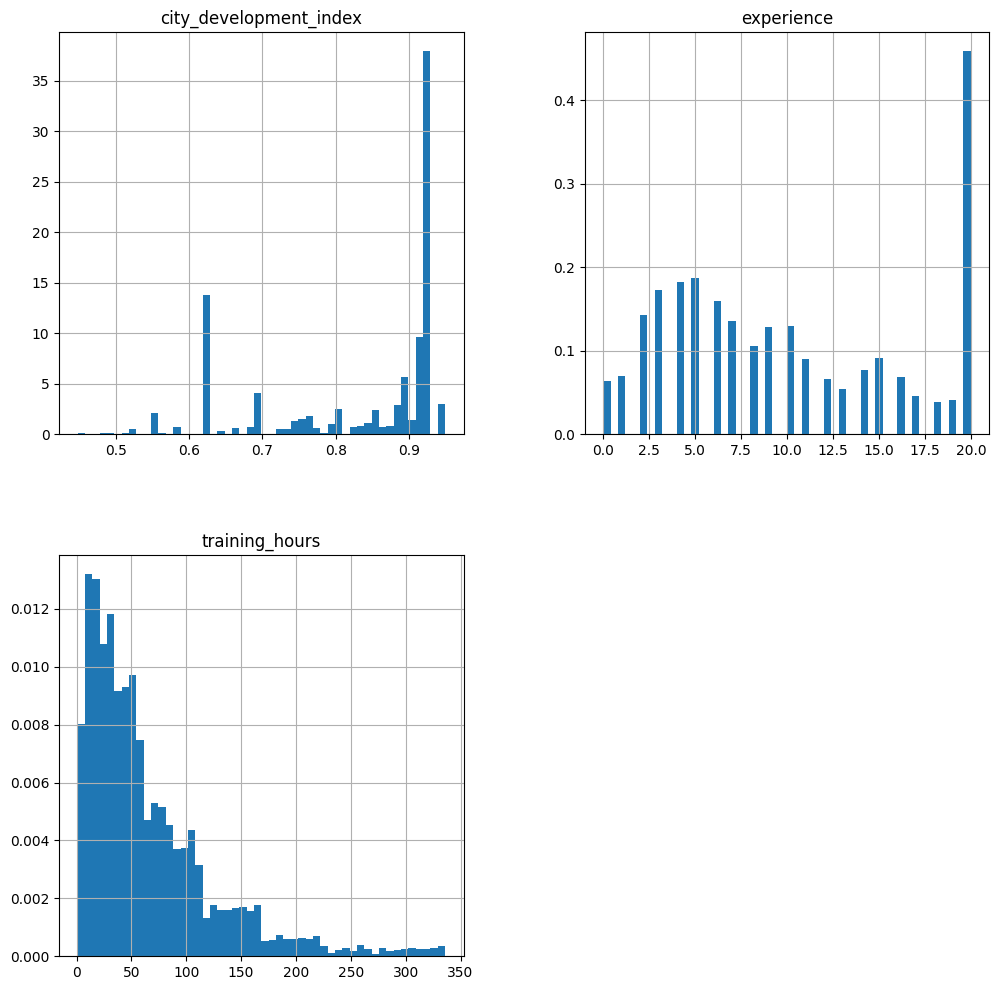

In [ ]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

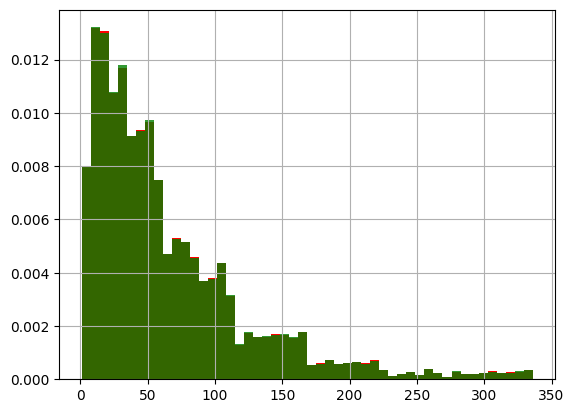

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

# As green (before cca) and red (after cca ) overlaps near perfectly proving data is mcar


<Axes: ylabel='Density'>

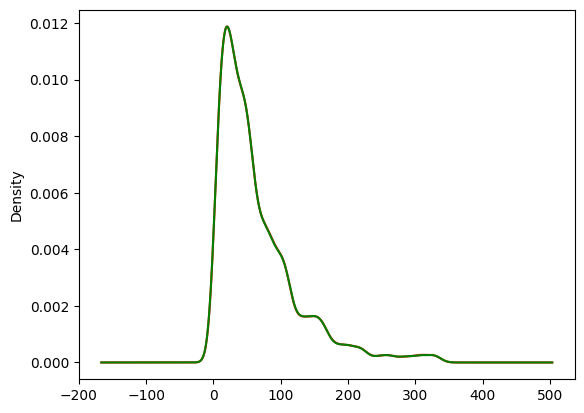

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

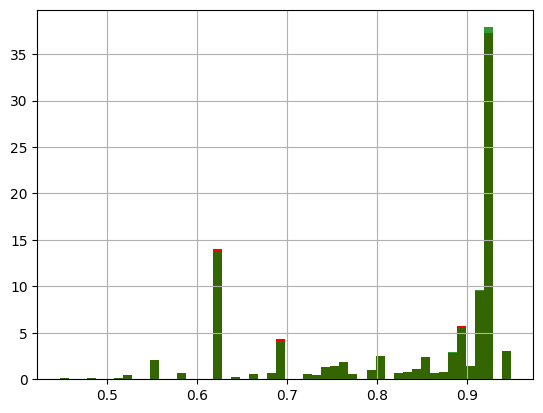

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

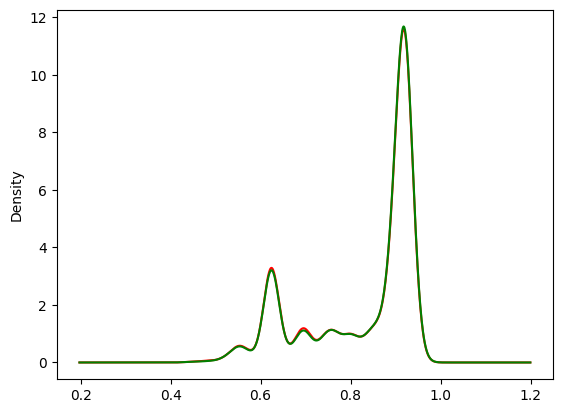

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

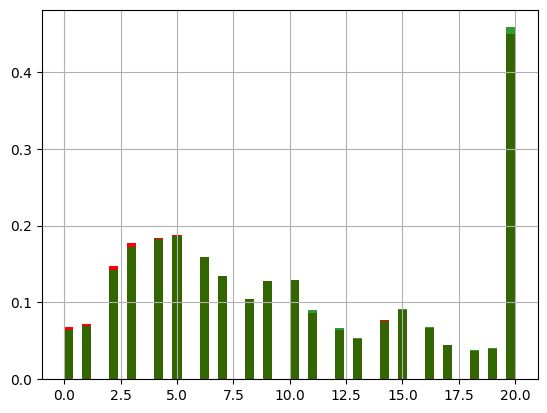

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

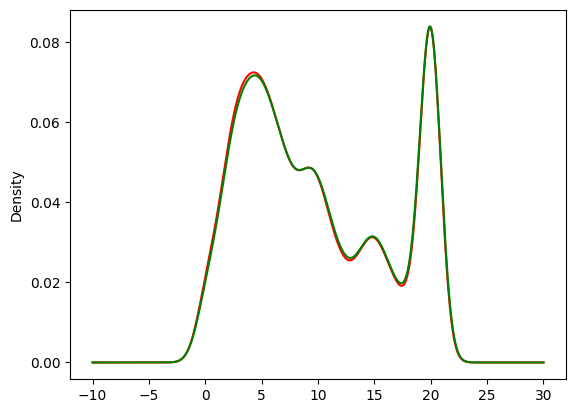

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [ ]:

temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


## Simple Imputer : Univariate Imputation
(Numerical data)

1. Mean/Median Distribution
Mean: when normally distributed data
Median: when skewed data

But
Changes Distribution

Adds Outliers

Covariance/Correlation changes

When to use:
1. MCAR
2. Less than 5% data missing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv('titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
X = df.iloc[:,:-1]
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [ ]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [ ]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()



In [ ]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)


In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
665,32.0,73.5000,2,32.000000,32.0,73.5000,73.5000
683,14.0,46.9000,7,14.000000,14.0,46.9000,46.9000
769,32.0,8.3625,0,32.000000,32.0,8.3625,8.3625
274,NaN,7.7500,0,29.498846,28.0,7.7500,7.7500
348,3.0,15.9000,2,3.000000,3.0,15.9000,15.9000


In [ ]:
# Variance SHRINKS after imputation
print('Original Age Variable variance : ',X_train['Age'].var())
print('Age Variable variance after mean imputation : ',X_train['Age_mean'].var())
print('Age Variable variance after median imputation : ',X_train['Age_median'].var())

print('Original Fare Variable variance : ',X_train['Fare'].var())
print('Fare Variable variance after mean imputation: ',X_train['Fare_mean'].var())
print('Fare Variable variance after median imputation : ',X_train['Fare'].var())


Original Age Variable variance :  210.2517072477438
Age Variable variance after mean imputation :  168.8519336687225
Age Variable variance after median imputation :  169.20731007048096
Original Fare Variable variance :  2761.031434948639
Fare Variable variance after mean imputation:  2621.2323749512393
Fare Variable variance after median imputation :  2761.031434948639


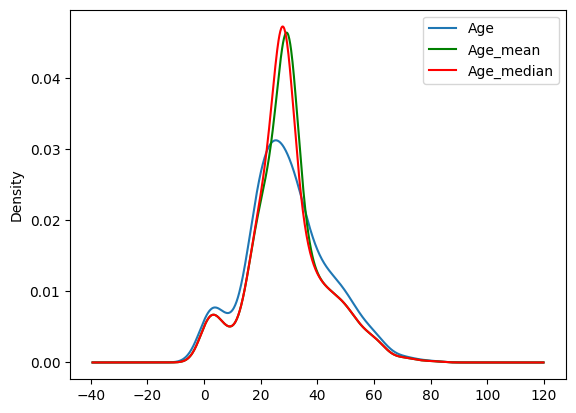

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution

X_train['Age'].plot(kind='kde',ax =ax)   # kde = Kernel density estimate

# mean imputation
X_train['Age_mean'].plot(kind = 'kde', ax = ax, color = 'green')

# median imputation
X_train['Age_median'].plot(kind = 'kde', ax = ax ,color = 'red')

# Add legendsss!!
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# TOOOOO DRASTIC OF CHANGEEE!!!

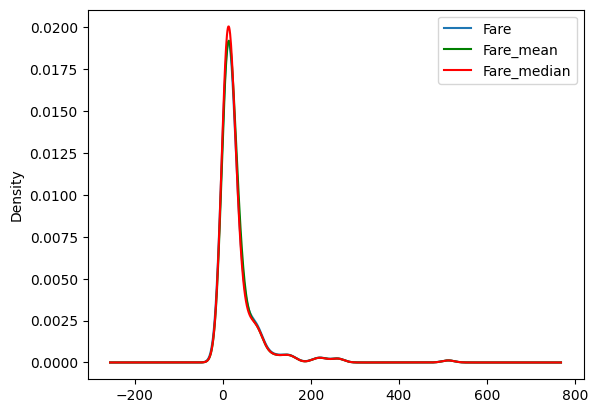

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution

X_train['Fare'].plot(kind='kde',ax =ax)   # kde = Kernel density estimate

# mean imputation
X_train['Fare_mean'].plot(kind = 'kde', ax = ax, color = 'green')

# median imputation
X_train['Fare_median'].plot(kind = 'kde', ax = ax ,color = 'red')

# Add legendsss!!
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Overlapping soo yesss thas gooodd😌

In [ ]:
# lets find the relation between these mfs : covariance :  measures the direction of the linear relationship between two variables and how they change together.
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [ ]:
# correlation:Correlation measures both the strength and the direction of the linear relationship between two variables. It essentially standardizes the covariance(-1 to 1)
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

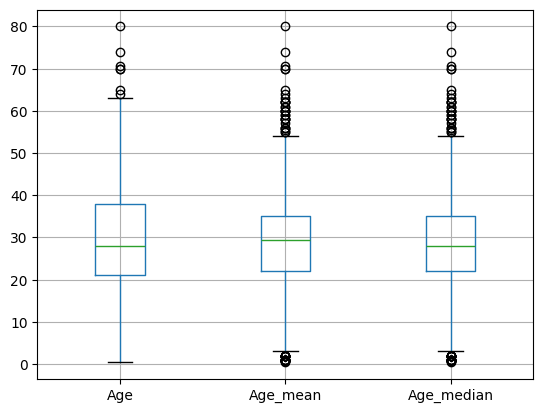

In [ ]:
X_train[['Age','Age_mean','Age_median']].boxplot()

NEWW OUTLIERS IN THE 'AGE' HOUSEEE!!, not done dude, red flaggg

<Axes: >

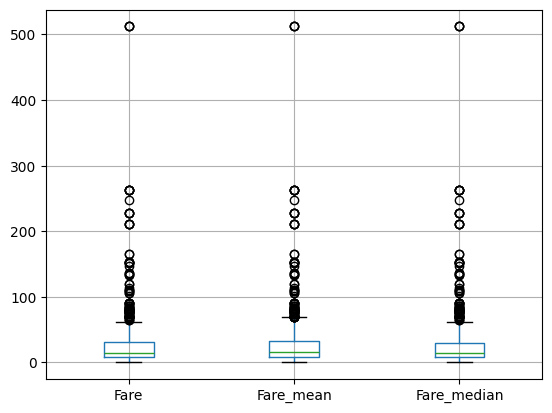

In [ ]:
 X_train[['Fare','Fare_mean','Fare_median']].boxplot()

Same as before so eh works *fare* ig
(see what i did there)

So mean median imputation would be used for fare column but not for age coz girl- thats a red flag



**Using Sklearn**